## Find users who submitted a qeury every day
```
Julia conducted a 15 days of learning SQL contest. The start date of the contest was March 01, 2016 and the end date was March 15, 2016.

Write a query to print total number of unique hackers who made at least ` submission each day (starting on the first day of the contest), and find the hacker_id and name of the hacker who made maximum number of submissions each day. If more than one such hacker has a maximum number of submissions, print the lowest hacker_id. The query should print this information for each day of the contest, sorted by the date.
```
#### Input Format
```
The following tables hold contest data:

1) Hackers: The hacker_id is the id of the hacker, and name is the name of the hacker.
```
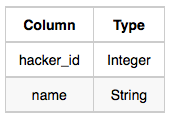
```
2) Submissions: The submission_date is the date of the submission, submission_id is the id of the submission, hacker_id is the id of the hacker who made the submission, and score is the score of the submission.
```
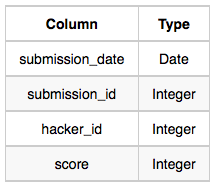
```
#### Sample Input

For the following sample input, assume that the end date of the contest was March 06, 2016.

Hackers Table:
```
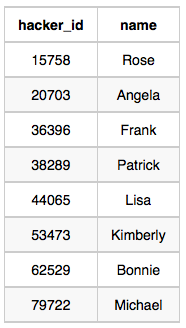
```
Submissions Table:
```
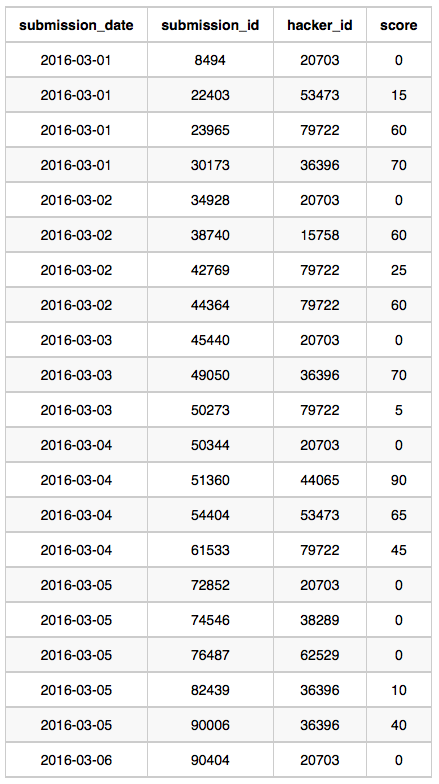
```
Sample Output

2016-03-01 4 20703 Angela
2016-03-02 2 79722 Michael
2016-03-03 2 20703 Angela
2016-03-04 2 20703 Angela
2016-03-05 1 36396 Frank
2016-03-06 1 20703 Angela

Explanation

On March 01, 2016 hackers 20703, 36396, 53473, and 79722 made submissions. There are 4 unique hackers who made at least one submission each day. As each hacker made one submission, 20703 is considered to be the hacker who made maximum number of submissions on this day. The name of the hacker is Angela.

On March 02, 2016 hackers 15758, 20703, and 79722 made submissions. Now 20703 and 79722 were the only ones to submit every day, so there are 2 unique hackers who made at least one submission each day. 79722 made 2 submissions, and name of the hacker is Michael.

On March 03, 2016 hackers 20703, 36396, and 79722 made submissions. Now 20703 and 79722 were the only ones, so there are 2 unique hackers who made at least one submission each day. As each hacker made one submission so 20703 is considered to be the hacker who made maximum number of submissions on this day. The name of the hacker is Angela.

On March 04, 2016 hackers 20703, 44065, 53473, and 79722 made submissions. Now 20703 and 79722 only submitted each day, so there are 2 unique hackers who made at least one submission each day. As each hacker made one submission so 20703 is considered to be the hacker who made maximum number of submissions on this day. The name of the hacker is Angela.

On March 05, 2016 hackers 20703, 36396, 38289 and 62529 made submissions. Now 20703 only submitted each day, so there is only 1 unique hacker who made at least one submission each day. 36396 made 2 submissions and name of the hacker is Frank.

On March 06, 2016 only 20703 made submission, so there is only 1 unique hacker who made at least one submission each day. 20703 made 1 submission and name of the hacker is Angela.

```
/*
Enter your query here.
*/
SELECT
    d.submission_date,
    d.total_hackers,
    t.hacker_id,
    h.name
FROM
(
    /* count hackers who submitted every day so far */
    SELECT
        s1.submission_date,
        COUNT(DISTINCT s1.hacker_id) AS total_hackers
    FROM Submissions s1
    WHERE NOT EXISTS (
        SELECT 1
        FROM Submissions s2
        WHERE s2.submission_date < s1.submission_date
          AND NOT EXISTS (
              SELECT 1
              FROM Submissions s3
              WHERE s3.hacker_id = s1.hacker_id
                AND s3.submission_date = s2.submission_date
          )
    )
    GROUP BY s1.submission_date
) d
JOIN
(
    /* top hacker per day */
    SELECT
        s4.submission_date,
        s4.hacker_id
    FROM Submissions s4
    WHERE s4.hacker_id = (
        SELECT s5.hacker_id
        FROM Submissions s5
        WHERE s5.submission_date = s4.submission_date
        GROUP BY s5.hacker_id
        ORDER BY COUNT(*) DESC, s5.hacker_id
        LIMIT 1
    )
    GROUP BY s4.submission_date, s4.hacker_id
) t
    ON d.submission_date = t.submission_date
JOIN Hackers h
    ON h.hacker_id = t.hacker_id
ORDER BY d.submission_date;
```